# Analysis & Insights

This dataset is taken as a subset from __European Social Survey__ with variables related to <code style="background:yellow;color:black">Media, Use and Trust</code>.We will look into the data in detail.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
%run viz.py

In [153]:
# read the file
df = pd.read_csv("ESS1-9e01_1.csv")
df.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,nwsppol,nwspol,netusoft,netuse,netustm,ppltrst,pplfair,pplhlp,gndr,agea
0,BE,ESS1-9e01,1.0,10.12.2020,13223,ESS1e06_6,1,6.6,4,1.0,...,66.0,NaN,NaN,0.0,NaN,5,9,1,9,999
1,BE,ESS1-9e01,1.0,10.12.2020,13224,ESS1e06_6,1,6.6,9,1.0,...,66.0,NaN,NaN,2.0,NaN,4,7,5,2,999
2,BE,ESS1-9e01,1.0,10.12.2020,13225,ESS1e06_6,1,6.6,11,1.0,...,66.0,NaN,NaN,1.0,NaN,0,7,6,2,69
3,BE,ESS1-9e01,1.0,10.12.2020,13226,ESS1e06_6,1,6.6,13,1.0,...,2.0,NaN,NaN,7.0,NaN,7,8,5,2,41
4,BE,ESS1-9e01,1.0,10.12.2020,13227,ESS1e06_6,1,6.6,16,1.0,...,1.0,NaN,NaN,1.0,NaN,7,8,5,2,45


## Understanding the variables

Let's understand the variables from the following [link](http://www.europeansocialsurvey.org/downloadwizard/):

- `cntry` : country
- `cntry`, `cedition`, `cproddat` : Title, edition and production date of dataset
- `essround` : ESS round of data
- `edition` : edition
- `idno` : repsondent identification number
- `dweight`, `pspwght`, `pweight`,`anweight` : These are all weighting strategies for samples.
- `tvtot` : TV watching, total time on average weekday
- `tvpol` : TV watching, news/politics/current affairs on average weekday
- `rdtot` : Radio listening, total time on average weekday
- `rdpol` : Radio listening, news/politics/current affairs on average weekday
- `nwsptot`: Newspaper reading, total time on average weekday
- `nwsppol`: Newspaper reading, politics/current affairs 
- `nwspol`: News about politics and current affairs, watching, reading or listening, in minutes
- `netusoft`: Internet use, how often in minutes
- `netuse` : Personal use of internet/e-mail/www
- `netustm` : Internet use, how much time on typical day, in minutes
- `ppltrst` : Most people can be trusted or you can't be too careful
- `pplfair` : Most people try to take advantage of you, or try to be fair
- `pplhlp`  : Most of the time people helpful or mostly looking out for themselves
- `gndr`    : '1' : Male, '2' : Female , '9' : Not known
- `agea`    : age of the respondent

The following scale is used to evaluate the response from people of various countries. We will use this response for our analysis:

![scaling.png](Scaling.png)                                                                         ![Time scaling.png](Time.png)


We observe as the value in the scale increases the use of the entity tends to increase.


> We have created class module called __viz.py__ with all the important methods to look into data. It also has various visualisation plot methods to avoid repetition of code

In [79]:
# Lets see the data
d = description(df)
d.data_description(summary = True)

The number of points in this data is 235361 

The shape of the data is (235361, 32) 

Let's see the data : 

The summary of data set is : 
       cedition         cseqno       essround        edition          idno  \
count  235361.0  235361.000000  235361.000000  235361.000000  2.353610e+05   
mean        1.0  213644.421914       4.895964       3.545919  2.064896e+09   
std         0.0  117536.086680       2.555268       1.328416  2.621840e+10   
min         1.0   13223.000000       1.000000       2.200000  1.000000e+00   
25%         1.0  133111.000000       3.000000       2.400000  1.875000e+03   
50%         1.0  191951.000000       5.000000       3.400000  1.089200e+04   
75%         1.0  327554.000000       7.000000       3.700000  1.214020e+05   
max         1.0  398852.000000       9.000000       6.600000  5.101304e+11   

             dweight        pspwght        pweight       anweight  \
count  235361.000000  235361.000000  235361.000000  235361.000000   
mean        1.000002

> The data contains several n.a values inside it. Replacing these values will distort the distribution. We will try to aggregate based on some factors and specifically look for insights.

In [80]:
# let's see how many countries we have
d.value_counts('cntry')

The unique values in each category of cntry is : 
DE    25700
GB    19830
FI    17955
ES    17169
FR    17061
NL    16859
BE    16110
PT    16043
SE    15929
PL    15624
CH    15402
HU    14793
NO    14654
SI    12232
Name: cntry, dtype: int64


> We have only taken those country into account for whom we have data from all the __9 rounds.__

## Methodology

This data gives vital information about media use and trust in various geographical locations across Europe. We will try to accomplish the following:

1. Aggregate the values based on some factors to be properly visualized.

2. Extract insights from the data and report the findings from the visualizations by looking into them extensively.

3. In order to find out what business value can be driven out from this data we have chosen this subset of data. We will focus on which platform <code style="background:yellow;color:black">targeted advertisements</code> can play an important factor across demography, gender, and age. This commercial aspect can be used by organizations for their revenue growth model.



- Since we have data at various scale(0 - 7 or 0 - 9) we will remove the data from the selected columns so that we can work with data giving proper information.

- We will try to remove all outlier information like 77, 88, 99, 7777 etc.

In [156]:
# select the cols
cols = ['tvtot','tvpol', 'rdtot', 'rdpol', 'nwsptot', 'nwsppol', 'nwspol', 'netusoft',
       'netuse', 'netustm', 'ppltrst', 'pplfair', 'pplhlp']
for i in cols:
     df[i] = df[i].apply(lambda x: np.nan if x > 8 else x)

> We will map the country alias with proper country names and also mark which part of Europe i.e Eastern or Western these countries are located.

In [157]:
# map country names and part of europe
alias = {
'BE' : 'Belgium',
'BG' : 'Bulgaria',
'CH' : 'Switzerland',
'DE'    : 'Germany',
'GB'    : 'England',
'FI'    : 'Finland',
'ES'    : 'Estonia',
'FR'    : 'France',
'NL'    : 'Netherlands',
'BE'    : 'Belgium',
'PT'    : 'Portugal',
'SE'    : 'Sweden',
'PL'    : 'Poland',
'HU'    : 'Hungary',
'NO'    : 'Norway',
'SI'    : 'Slovenia',
    }

# part of Europe
europe =  {
'BE' : 'Western',
'BG' : 'Eastern',
'CH' : 'Western',
'DE'    : 'Western',
'GB'    : 'Western',
'FI'    : 'Western',
'ES'    : 'Eastern',
'FR'    : 'Western',
'NL'    : 'Western',
'BE'    : 'Western',
'PT'    : 'Western',
'SE'    : 'Western',
'PL'    : 'Western',
'HU'    : 'Eastern',
'NO'    : 'Western',
'SI'    : 'Eastern',
    }

# Gender coding
gender = {
1 : 'Male',
2 : 'Female',
9 : 'Not Known'
}

# mapping attributes
df['country']     = df['cntry'].map(alias)
df['europe_part'] = df['cntry'].map(europe)
df['gender']      = df['gndr'].map(gender)


> In order to understand which __age group__ the people belong to we will bin the different age group of people into various labels:

- Young  : < 25
- Adult  : 25 - 40
- Midage : 40 - 75
- Old    : > 75

In [158]:
# bining the age 
df[df['agea'] > 150]['agea'] = 0    # lets remove these values and better leave them as n.a
df['age']    = pd.cut(df['agea'], [1, 25, 40, 75, 150], labels=['Young', 'Adult', 'Midage', 'Old'])

C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Selective visualisation

### Media usage across Geography and Age group

In this visualisation we will try to understand how much time do people spent time on media on an average across various age groups and country. This will help us to understand which media platform people are mostly interested in. 


In [159]:
## Lets see aggregrated country wise report of tv , radio, news and net
t = pd.DataFrame(df.groupby(['country', 'age']).agg({'tvtot':'mean',
                                            'rdtot': 'mean',
                                            'nwsptot': 'mean',
                                           'netustm': 'mean'})).reset_index()
t = t.sort_values(by = ['tvtot', 'rdtot'])
viz = visualisation(t)

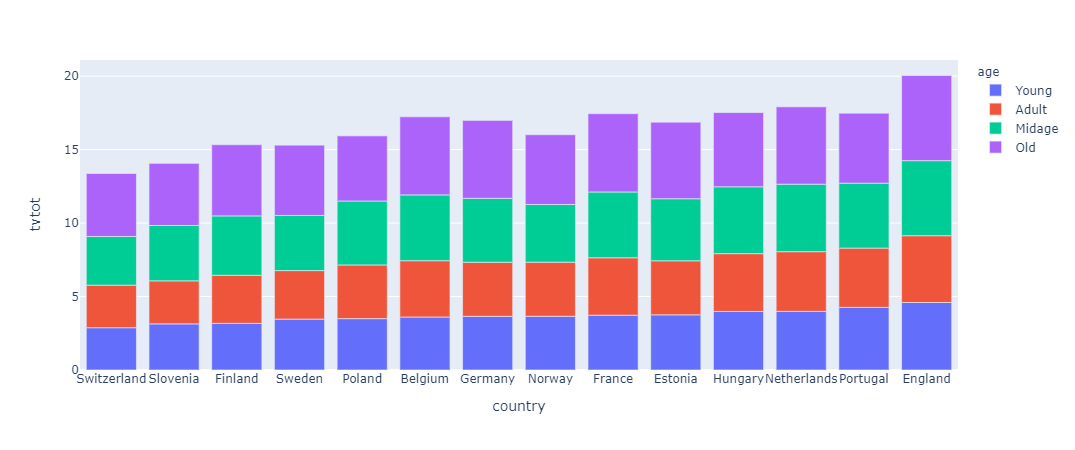

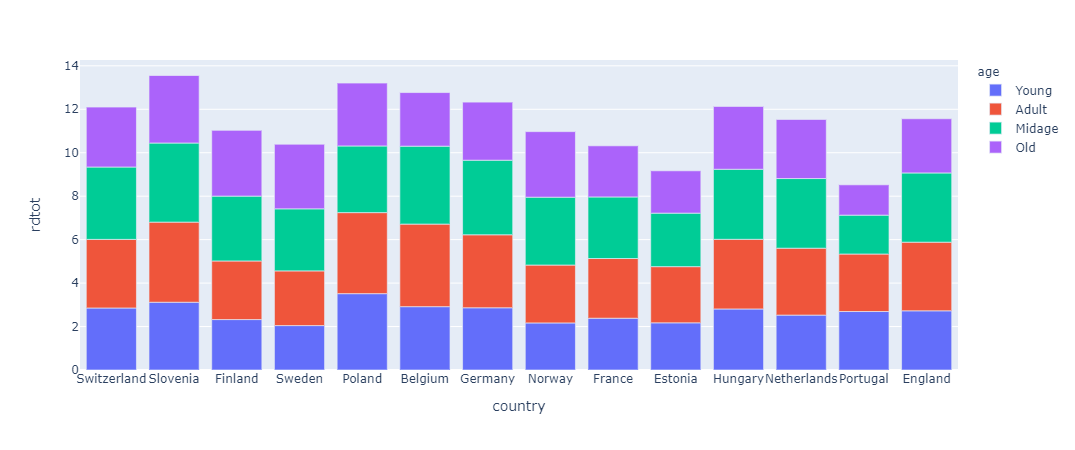

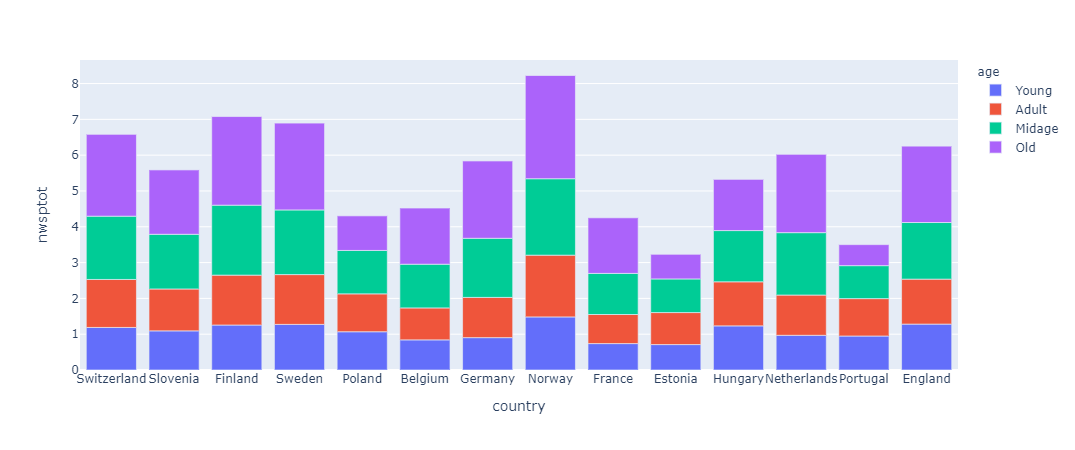

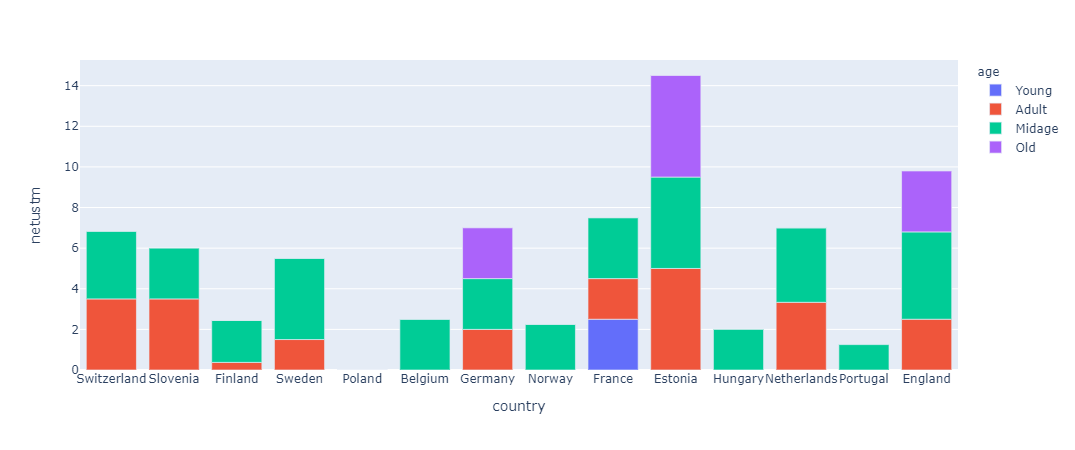

In [160]:
# lets plot it
viz.bar_plot(x = 'country', y = 'tvtot', color = 'age')
viz.bar_plot(x = 'country', y = 'rdtot', color = 'age')
viz.bar_plot(x = 'country', y = 'nwsptot', color = 'age')
viz.bar_plot(x = 'country', y = 'netustm', color = 'age')

*Observations*

- Overall digital media like TV makes more presence than radio and newspaper thus suggesting to us that advertisements made over these channels will lead to more conversion.

- The data suggests old people in general spend more time across various channels. 

- The tv and radio usage in hours is very __homogenously distributed__ across various age groups. This can certainly be a source of target people across diverse products.

- We critically lack the data regarding internet usage among various age groups. We will look at internet usage separately.

### Internet Usage

Let's understand internet usage across various demographies and age groups.

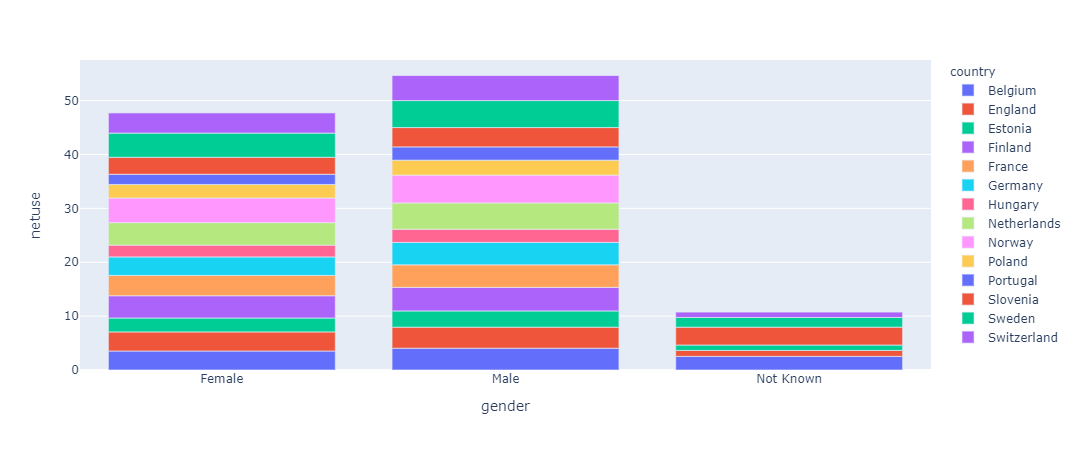

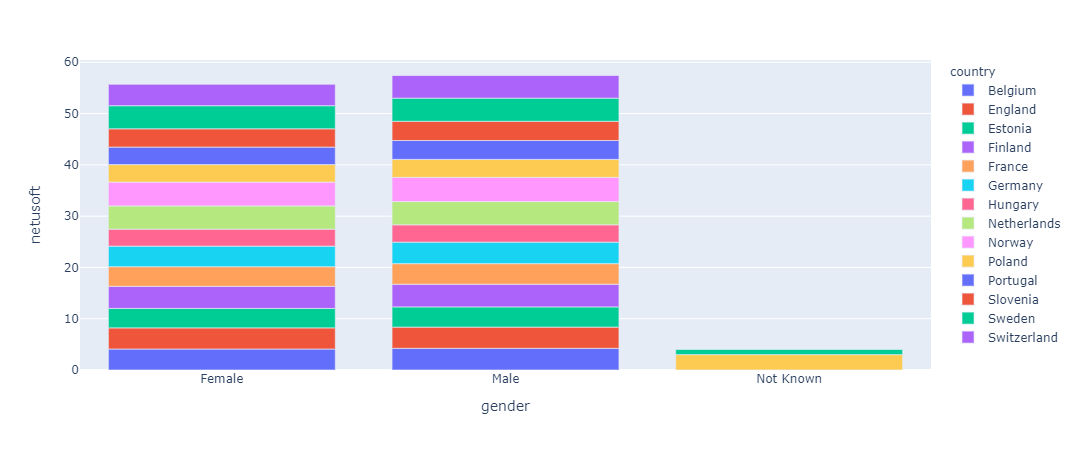

In [161]:
# lets see net use stats in different European countries
t = pd.DataFrame(df.groupby(['country', 'gender']).
                 agg({'netuse':'mean','netusoft': 'mean'})).reset_index()
viz = visualisation(t)
viz.bar_plot(x = 'gender', y = 'netuse',  color = 'country')
viz.bar_plot(x = 'gender', y = 'netusoft', color = 'country')

> A distinguished observation can be made from these graphs that internet usage among male is tentatively __high__. Although when it comes to usage of internet over __various devices__ 'netusoft' it tends to be very similar.

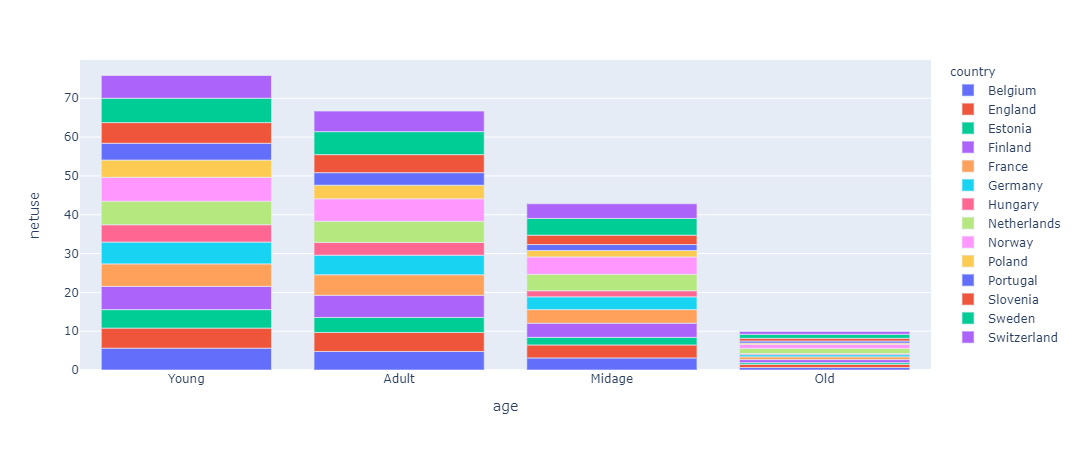

In [162]:
# lets see net use stats in different European countries
t = pd.DataFrame(df.groupby(['country', 'age']).agg({'netuse':'mean',
                                            'netustm': 'mean'})).reset_index()
viz = visualisation(t)
viz.bar_plot(x = 'age', y = 'netuse',  color = 'country')

> Clearly, it can be observed the new generation is the one using internet extensively.

### Political news and target group

We will now try to understand which are the popular channels for political news and discussion

In [163]:
## Lets see aggregrated country wise report of tv , radio, news and net
t = pd.DataFrame(df.groupby(['country', 'age']).agg({'tvpol':'mean',
                                            'rdpol': 'mean',
                                            'nwspol': 'mean'})).reset_index()
t = t.sort_values(by = ['tvpol', 'rdpol', 'nwspol'])
viz = visualisation(t)

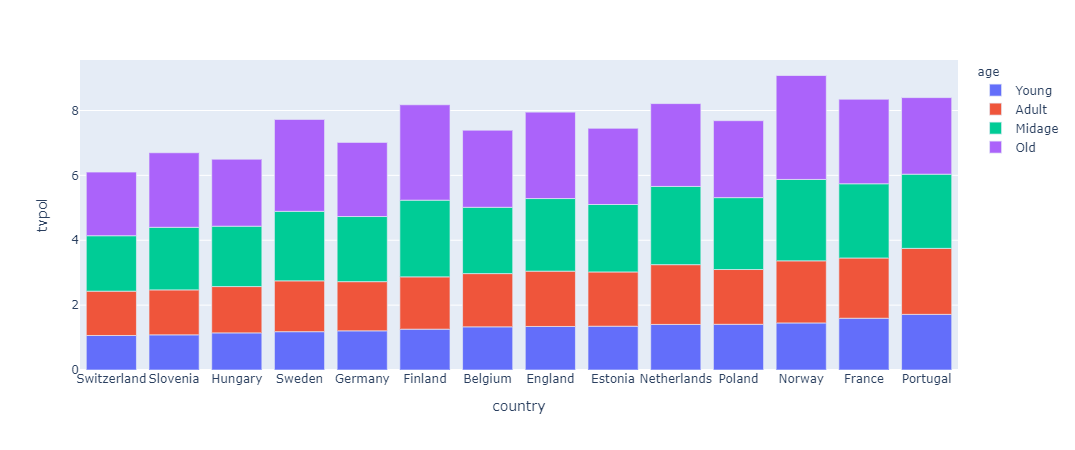

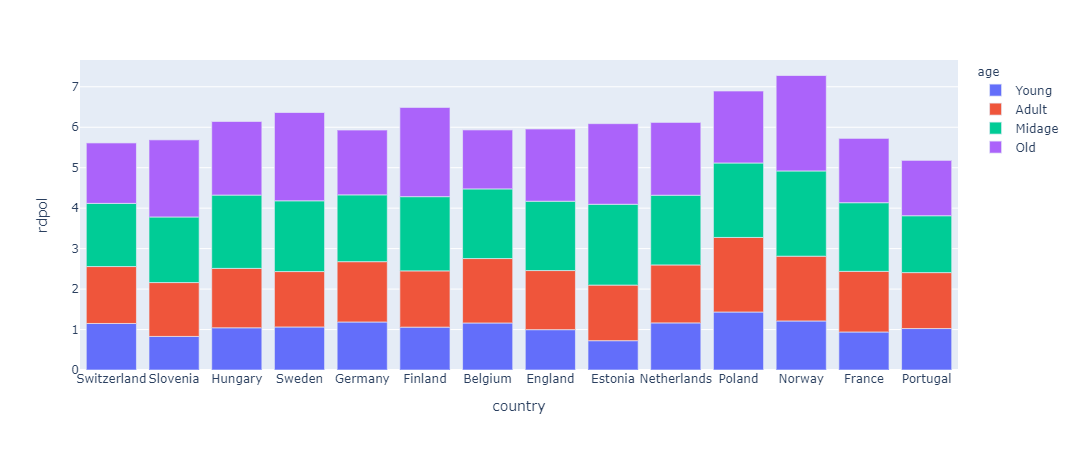

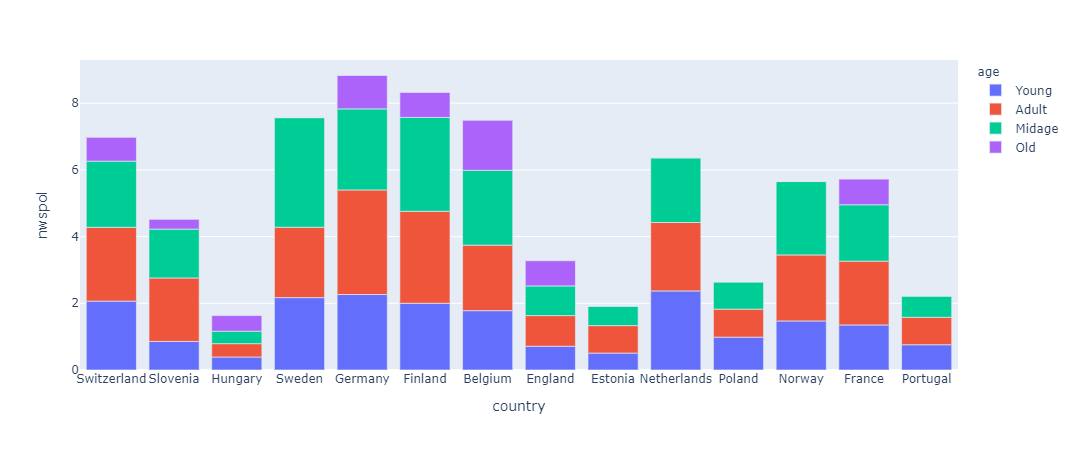

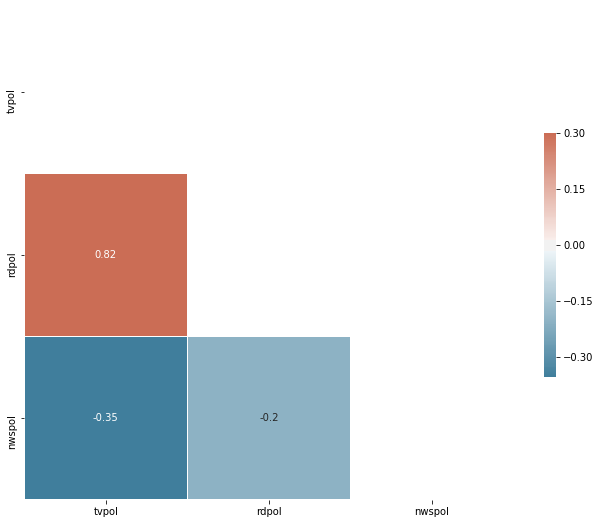

In [164]:
# plot it
viz.heat_map()
viz.bar_plot(x = 'country', y = 'tvpol',  color = 'age')
viz.bar_plot(x = 'country', y = 'rdpol',  color = 'age')
viz.bar_plot(x = 'country', y = 'nwspol',  color = 'age')


*Observations:*

- TV and RADIO remain the selected way to follow political news. There is also a positive correlation between the two.

- Political advertisements made on these two channels can make a huge difference. As per media reports, radio is often neglected as an advertisement source which can be taken into account.

- Newspaper remains a selected channel of news for instance in Germany as compared to other channels.


## Digital media in western and eastern europe

As observed before digital media is preferred way of communication. Lets see how it is used in two parts of Europe.

In [165]:
## Lets see aggregrated country wise report of tv , radio, news and net
t = pd.DataFrame(df.groupby(['europe_part', 'age']).agg({'tvtot':'mean',
                                            'netuse': 'mean'})).reset_index()
t = t.sort_values(by = ['tvtot', 'netuse'])
viz = visualisation(t)

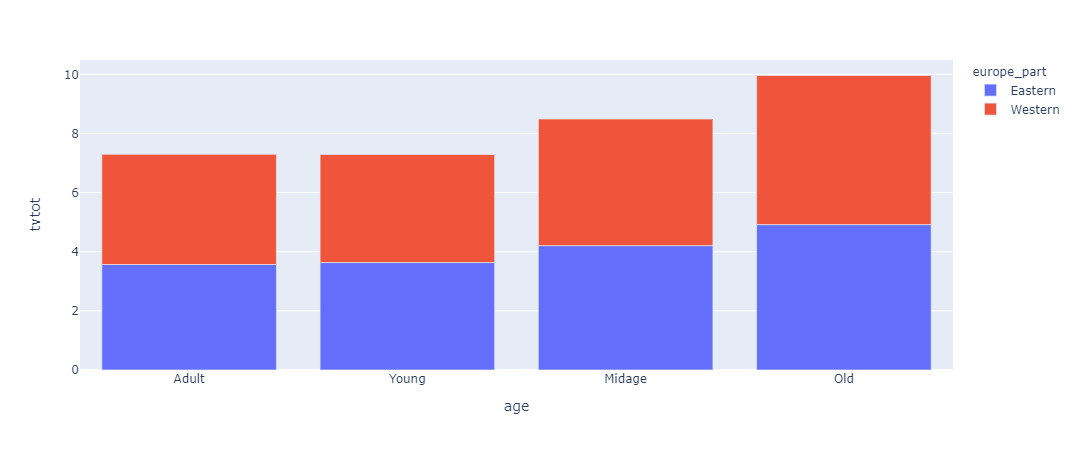

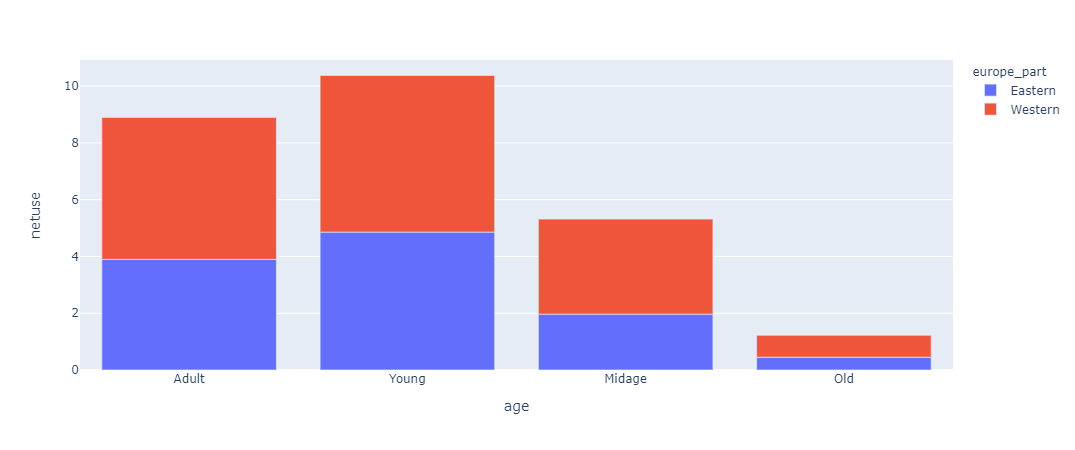

In [166]:
viz.bar_plot(x = 'age', y = 'tvtot', color = 'europe_part')
viz.bar_plot(x = 'age', y = 'netuse', color = 'europe_part')

*Observations*

- We observe among both the parts of Europe across age groups Western Europe shows more amount of time spent on digital media.

- It also correlates with the [report](https://www.statista.com/statistics/435157/tv-ad-spend-in-europe-by-region/) of ad spending by Google which shows very __high spending__ on advertisements in western Europe as compared to eastern Europe.

- To align with this fact to reach out to more target groups in Eastern Europe companies should reach out to people through other communication channels like Radio and Newspapers for more conversions.

### People trust and help

Let's see what people think related to trust and issues in various demographic parts of Europe and across gender.

In [167]:
# let's see the visualisation with respect to gender first
t = pd.DataFrame(df.groupby(['europe_part', 'gender']).agg(
                                           {'ppltrst':'mean',
                                            'pplfair': 'mean',
                                            'pplhlp': 'mean'})).reset_index()
viz = visualisation(t)

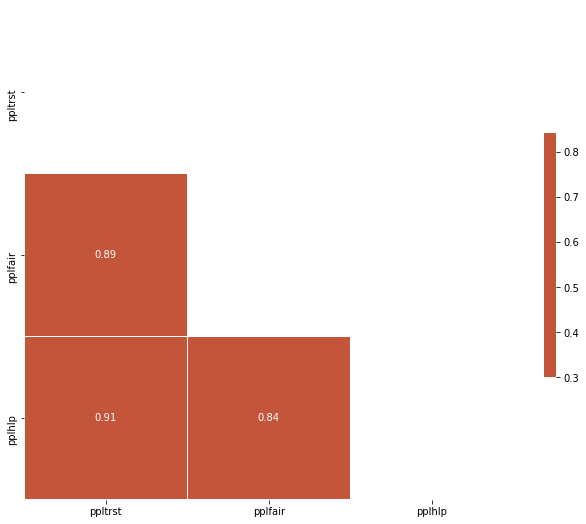

In [168]:
# let's see heat map of these values
viz.heat_map()

> As per our analysis people being helpful(pplhlp) have very high coorelation with people being trustful and people being fair.

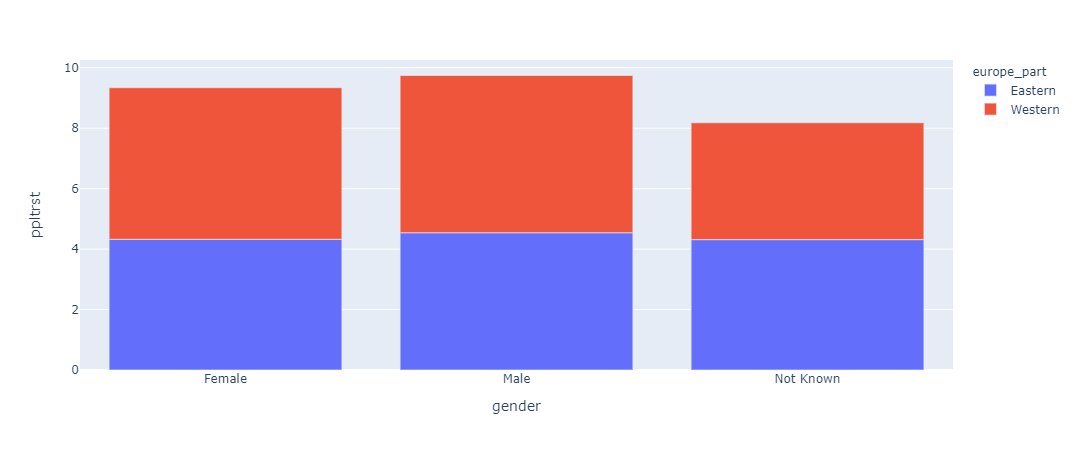

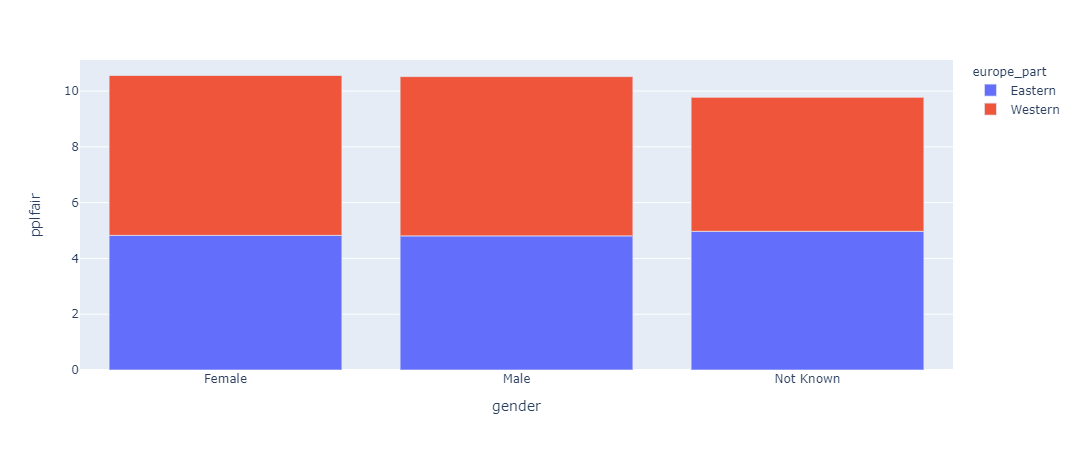

In [169]:
# let see w.r.t to gender
viz.bar_plot(x = 'gender', y = 'ppltrst', color = 'europe_part')
viz.bar_plot(x = 'gender', y = 'pplfair', color = 'europe_part')

*Observations*

- With respect to trust females make less trust in people as compared to males. But they think tentatively more that people are fair.

- In general, Eastern Europe people have less trust in people across genders.

- Across Europe, our solution would be making brands trust people or organizing campaigns that would lead to brand trust and loyalty. 

